## 1.import data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
columns = ["age", "sex", "cp", "restbp", "chol", "fbs", "restecg", 
           "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
data= pd.read_table('./heart_disease_all.csv', sep=',', header=None, names=columns)

In [3]:
data.describe()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


## 2. data preprocessing

### 2.1 one-hot

In [4]:
#change data into one-hot code
dummies = pd.get_dummies(data["cp"],prefix="cp")
data      = data.join(dummies)
del data["cp"]
dummies = pd.get_dummies(data["restecg"],prefix="recg")
data      = data.join(dummies)
del data["restecg"]

dummies = pd.get_dummies(data["slope"],prefix="slope")
data      = data.join(dummies)
del data["slope"]

dummies = pd.get_dummies(data["ca"],prefix="ca")
data      = data.join(dummies)
del data["ca"]

dummies = pd.get_dummies(data["thal"],prefix="thal")
data      = data.join(dummies)
del data["thal"]

In [5]:
data.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,num,cp_1.0,...,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,1,1,0,0,0,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,2.0,0,...,0,1,0,0,0,0,1,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,1.0,0,...,0,1,0,0,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,0,1,1,0,0,0,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,1,0,0,1,0,0,0,1,0,0


### 2.2 data normalization

In [6]:
from sklearn import preprocessing
scaler=preprocessing.MinMaxScaler()
data.iloc[:,0]= scaler.fit_transform(data.iloc[:,0].reshape(-1,1))
data.iloc[:,2]= scaler.fit_transform(data.iloc[:,2].reshape(-1,1))
data.iloc[:,3]= scaler.fit_transform(data.iloc[:,3].reshape(-1,1))
data.iloc[:,5]= scaler.fit_transform(data.iloc[:,5].reshape(-1,1))
data.iloc[:,7]= scaler.fit_transform(data.iloc[:,7].reshape(-1,1))

/Users/wangzuxiu/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/wangzuxiu/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.
/Users/wangzuxiu/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """
/Users/wangzuxiu/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/Users/wangzuxiu/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: F

In [7]:
data.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,num,cp_1.0,...,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,0.708333,1.0,0.481132,0.244292,1.0,0.603053,0.0,0.370968,0.0,1,...,0,0,1,1,0,0,0,0,1,0
1,0.791667,1.0,0.622642,0.365297,0.0,0.282443,1.0,0.241935,2.0,0,...,0,1,0,0,0,0,1,1,0,0
2,0.791667,1.0,0.245283,0.235160,0.0,0.442748,1.0,0.419355,1.0,0,...,0,1,0,0,0,1,0,0,0,1
3,0.166667,1.0,0.339623,0.283105,0.0,0.885496,0.0,0.564516,0.0,0,...,0,0,1,1,0,0,0,1,0,0
4,0.250000,0.0,0.339623,0.178082,0.0,0.770992,0.0,0.225806,0.0,0,...,1,0,0,1,0,0,0,1,0,0


### 2.3 split train data and test data

In [8]:
Y_train=data.iloc[:,8]
X_train=data.copy()
del X_train["num"]

In [9]:
X_train,X_test,Y_train,Y_test = train_test_split(X_train,Y_train,test_size=0.2,random_state=42)

In [10]:
X_train.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,cp_1.0,cp_2.0,...,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
273,0.208333,0.0,0.415094,0.214612,0.0,0.618321,0.0,0.000000,0,0,...,0,1,0,1,0,0,0,1,0,0
259,0.645833,0.0,0.528302,0.260274,0.0,0.763359,0.0,0.145161,1,0,...,1,0,0,1,0,0,0,1,0,0
30,0.833333,0.0,0.433962,0.257991,0.0,0.610687,0.0,0.290323,1,0,...,1,0,0,0,0,1,0,1,0,0
22,0.604167,1.0,0.245283,0.360731,0.0,0.679389,0.0,0.290323,0,1,...,0,1,0,1,0,0,0,1,0,0
277,0.375000,1.0,0.339623,0.289954,0.0,0.824427,0.0,0.000000,0,0,...,1,0,0,1,0,0,0,1,0,0


## 3.SVM_proposed approach model

## 3.1 SelectKBest

In [11]:
X_train.shape

(237, 25)

In [12]:
X_test.shape

(60, 25)

In [13]:
X_all=X_train.append(X_test)

In [14]:
X_all.shape

(297, 25)

In [15]:
Y_all=Y_train.append(Y_test)

In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_All=SelectKBest(chi2,k=10).fit_transform(X_all,Y_all)

In [17]:
X_All.shape

(297, 10)

In [18]:
from pandas import DataFrame
X_All=DataFrame(X_All)

In [19]:
X_Train=X_All.iloc[0:237,:]
X_Test=X_All.iloc[237:,:]

### 3.2 using validation_curve choose best range of C

In [20]:
from sklearn.learning_curve import validation_curve
from sklearn.svm import SVC
c_range=np.logspace(-2,5,8)
train_scores,test_scores=validation_curve(SVC(),X_Train,Y_train,param_name="C",param_range=c_range,cv=5,scoring="accuracy")

/Users/wangzuxiu/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/wangzuxiu/anaconda2/lib/python2.7/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


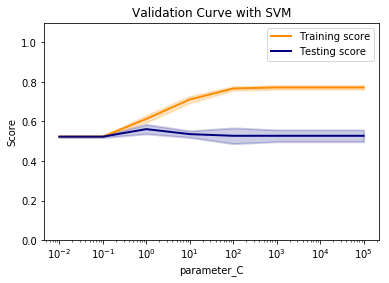

In [21]:
train_scores_mean=np.mean(train_scores,axis=1)
test_scores_mean=np.mean(test_scores,axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
import matplotlib.pyplot as plt
plt.title("Validation Curve with SVM")
plt.xlabel("parameter_C")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(c_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(c_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(c_range, test_scores_mean, label="Testing score",
             color="navy", lw=lw)
plt.fill_between(c_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

### 3.3 using validation_curve choose best range of gamma

In [22]:
from sklearn.learning_curve import validation_curve
param_range=np.logspace(-4,1,6)
train_scores,test_scores=validation_curve(SVC(),X_Train,Y_train,param_name="gamma",param_range=param_range,cv=5,scoring="accuracy")

In [23]:
train_scores_mean=np.mean(train_scores,axis=1)
test_scores_mean=np.mean(test_scores,axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

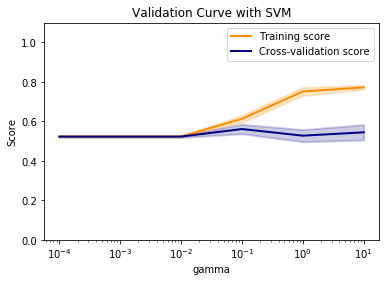

In [24]:
plt.title("Validation Curve with SVM")
plt.xlabel("gamma")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

### 3.4 using grid search to choose the best parameters

In [25]:
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
svm = SVC()
param_grid={'C':[0.1,1,5,10,50,100],'gamma':[0.001,0.004,0.01,0.03,0.05,0.08,0.1,1]}
#param_grid={'C':[1e-3,1e-2,1e-1,1],'gamma':[0.001]}
grid=GridSearchCV(svm,param_grid,cv=10)
grid.fit(X_Train,Y_train)

/Users/wangzuxiu/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 5, 10, 50, 100], 'gamma': [0.001, 0.004, 0.01, 0.03, 0.05, 0.08, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [26]:
grid.best_params_

{'C': 10, 'gamma': 0.05}

## 4.train SVM model

In [27]:
from sklearn.svm import SVC
svm_clf = SVC(C=10,gamma=0.05)
svm_clf.fit(X_Train, Y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.05, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
y_pre=svm_clf.predict(X_Test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pre) 

0.6833333333333333

In [29]:
df=data.copy()
df.loc[df['num']>0,'num']=1
Y_train_two=df.iloc[:,8]
X_train_two=df.copy()
del X_train_two["num"]

In [30]:
X_train_two,X_test_two,Y_train_two,Y_test_two = train_test_split(X_train_two,Y_train_two,test_size=0.2,random_state=42)

In [31]:
from sklearn.svm import SVC
svm_clf_all = SVC(C=10,gamma=0.05)
svm_clf_all.fit(X_train_two, Y_train_two)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.05, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [32]:
y_pred=svm_clf_all.predict(X_test_two)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test_two,y_pred)  

0.8833333333333333

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
confusion_matrix(Y_test,y_pre)

array([[36,  0,  0,  0,  0],
       [ 4,  2,  2,  0,  1],
       [ 0,  2,  1,  2,  0],
       [ 1,  0,  3,  2,  1],
       [ 1,  1,  0,  1,  0]])